In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import time
import math
from collections import Counter

In [45]:
file_name = "airlines.csv"
airlines_data = pd.read_csv(file_name)
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [46]:
file_name = "flights.csv"
flights_data = pd.read_csv(file_name, dtype={ 'YEAR': int, 'MONTH': int, 'DAY': int, 'DAY_OF_WEEK': int,
                                             'AIRLINE': np.string_, 'FLIGHT_NUMBER': int, 'TAIL_NUMBER': np.string_, 
                                             'ORIGIN_AIRPORT': np.string_, 'DESTINATION_AIRPORT': np.string_, 
                                             'SCHEDULED_DEPARTURE': int, 'DEPARTURE_TIME': float,
                                             'DEPARTURE_DELAY': float, 'TAXI_OUT': float, 'WHEELS_OFF': float,
                                             'SCHEDULED_TIME': float, 'ELAPSED_TIME': float, 'AIR_TIME': float,
                                             'DISTANCE': int, 'WHEELS_ON': float, 'TAXI_IN': float, 'SCHEDULED_ARRIVAL': int,
                                             'ARRIVAL_TIME': float, 'ARRIVAL_DELAY': float, 'DIVERTED': int, 'CANCELLED': int,
                                             'CANCELLATION_REASON': np.string_, 'AIR_SYSTEM_DELAY': float, 'SECURITY_DELAY': float, 
                                             'AIRLINE_DELAY': float,'LATE_AIRCRAFT_DELAY': float,'WEATHER_DELAY': float,},
                          usecols=[1,4,7,8,16,17])
flights_data.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE
0,1,AS,ANC,SEA,169.0,1448
1,1,AA,LAX,PBI,263.0,2330
2,1,US,SFO,CLT,266.0,2296
3,1,AA,LAX,MIA,258.0,2342
4,1,AS,SEA,ANC,199.0,1448


In [47]:
flights_data = flights_data[flights_data.MONTH.isin([6])]
flights_data = pd.merge(flights_data, airlines_data, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_data.drop('IATA_CODE', axis=1, inplace=True)
flights_data.rename(columns={'AIRLINE_x': 'IATA_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)
flights_data.head()

,MONTH,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,AIRLINE
0,6,NK,LAS,IAH,149.0,1222,Spirit Air Lines
1,6,AA,SEA,DFW,217.0,1660,American Airlines Inc.
2,6,DL,ANC,SLC,261.0,2125,Delta Air Lines Inc.
3,6,US,SLC,CLT,202.0,1727,US Airways Inc.
4,6,F9,LAS,IAD,250.0,2065,Frontier Airlines Inc.


In [48]:
flights_data['SPEED'] = (60*flights_data['DISTANCE'])/(0.62137119*flights_data['AIR_TIME'])
flights_data.head()

,MONTH,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,AIRLINE,SPEED
0,6,NK,LAS,IAH,149.0,1222,Spirit Air Lines,791.926862
1,6,AA,SEA,DFW,217.0,1660,American Airlines Inc.,738.666650
2,6,DL,ANC,SLC,261.0,2125,Delta Air Lines Inc.,786.173796
3,6,US,SLC,CLT,202.0,1727,US Airways Inc.,825.545673
4,6,F9,LAS,IAD,250.0,2065,Frontier Airlines Inc.,797.590889


In [49]:
d = {'ORIGIN_AIRPORT': flights_data.ORIGIN_AIRPORT, 'IATA_CODE': flights_data.IATA_CODE, 'AIRLINE': flights_data.AIRLINE, 'SPEED': flights_data.SPEED}
df = pd.DataFrame(data=d)
df.to_csv("speed.csv", encoding='utf-8', index=False)

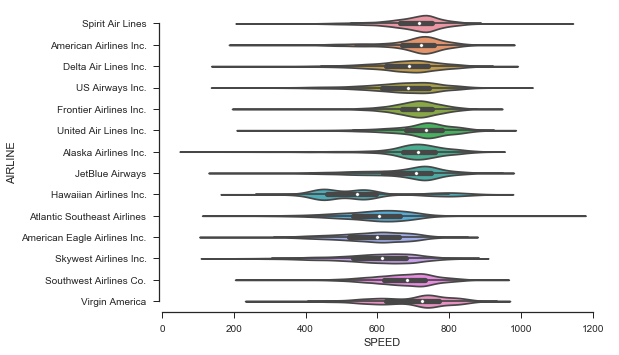

In [13]:
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="SPEED", y="AIRLINE", data=flights_data)
sns.despine(trim=True)
plt.show()

In [20]:
codes = []
values = []
for airline in airlines_data.IATA_CODE:
    airline_describe = flights_data.SPEED[flights_data.IATA_CODE == airline].describe()
    for i in range(5):
        codes.append(airline)
    values.append(airline_describe['min'])
    values.append(airline_describe['25%'])
    values.append(airline_describe['50%'])
    values.append(airline_describe['75%'])
    values.append(airline_describe['max'])

d = {'IATA_CODE': codes, 'SPEED': values}
df = pd.DataFrame(data=d)
df.to_csv("speed.csv", encoding='utf-8', index=False)

In [8]:
aa = flights_data.SPEED[flights_data.IATA_CODE == 'AA'].describe()

count    194223.000000
mean        661.614993
std         111.044888
min         151.964286
25%         598.120225
50%         667.045343
75%         731.101991
max        1126.669552
Name: SPEED, dtype: float64

In [15]:
aa['mean']

688.28317254778403

In [21]:
aa

count    712935.000000
mean        688.283173
std         104.144824
min         128.090645
25%         631.585413
50%         701.718078
75%         757.629640
max        1266.190332
Name: SPEED, dtype: float64